In [57]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [27]:
trial_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0"

fitness_df = pd.read_csv(trial_dir+"/fitness.csv")
gen_saves = np.linspace(0, 10000, 101, True, dtype=int)
traj_dirs = [trial_dir+"/traj_gen"+str(gen_int)+".csv" for gen_int in gen_saves]

# print(trial_dir+"/traj_gen"+str(0)+".csv")

In [30]:
# Unfortunately I need to back and fix all of these csv files
# I'll have a copy on my desktop (seems smart), but I need to fix the header on all these things

# First let's rename the original files
new_names = [traj_dir[:-4]+"_og.csv" for traj_dir in traj_dirs]
print(new_names)
for traj_dir, new_name in zip(traj_dirs, new_names):
    os.rename(traj_dir, new_name)

['/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen0_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen100_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen200_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen300_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen400_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen500_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1hiddenpoi/trial_0/traj_gen600_og.csv', '/home/gonzaeve/influence-shaping/results/preliminary/may_18/save_joint_trajs/1uav_1rover_1

In [47]:
# Now let's fix this up
correct_top_line = "rover_0_x, rover_0_y, uav_0_x, uav_0_y, hidden_poi_0_x, hidden_poi_0_y, rover_0_obs_0, rover_0_obs_1, rover_0_obs_2, rover_0_obs_3, rover_0_obs_4, rover_0_obs_5, rover_0_obs_6, rover_0_obs_7, rover_0_obs_8, rover_0_obs_9, rover_0_obs_10, rover_0_obs_11, uav_0_obs_0, uav_0_obs_1, uav_0_obs_2, uav_0_obs_3, uav_0_obs_4, uav_0_obs_5, uav_0_obs_6, uav_0_obs_7, uav_0_obs_8, uav_0_obs_9, uav_0_obs_10, uav_0_obs_11, rover_0_dx, rover_0_dy, uav_0_dx, uav_0_dy"
correct_top_line_list = [str_.replace(" ","") for str_ in correct_top_line.split(",")]
print(correct_top_line_list)

['rover_0_x', 'rover_0_y', 'uav_0_x', 'uav_0_y', 'hidden_poi_0_x', 'hidden_poi_0_y', 'rover_0_obs_0', 'rover_0_obs_1', 'rover_0_obs_2', 'rover_0_obs_3', 'rover_0_obs_4', 'rover_0_obs_5', 'rover_0_obs_6', 'rover_0_obs_7', 'rover_0_obs_8', 'rover_0_obs_9', 'rover_0_obs_10', 'rover_0_obs_11', 'uav_0_obs_0', 'uav_0_obs_1', 'uav_0_obs_2', 'uav_0_obs_3', 'uav_0_obs_4', 'uav_0_obs_5', 'uav_0_obs_6', 'uav_0_obs_7', 'uav_0_obs_8', 'uav_0_obs_9', 'uav_0_obs_10', 'uav_0_obs_11', 'rover_0_dx', 'rover_0_dy', 'uav_0_dx', 'uav_0_dy']


In [48]:
for traj_dir, og_traj_dir in zip(traj_dirs, new_names):
    # Load the csv in
    with open(traj_dir, 'w', newline='') as outfile, open(og_traj_dir, newline='') as infile:
        r = csv.reader(infile, delimiter=",", quotechar='"')
        w = csv.writer(outfile, delimiter=',', quotechar='"')
        for count, row in enumerate(r):
            if count == 0:
                w.writerow(correct_top_line_list)
            else:
                w.writerow(row)

In [49]:
# Now we can finally load in the trajectories
traj_dfs = [
    pd.read_csv(traj_dir)
    for traj_dir in traj_dirs
]

In [173]:
# Let's start by looking at the final trajectory where the rover and uav are clearly working in sync
final_traj_df = traj_dfs[-1]

rover_state_traj_x = final_traj_df["rover_0_x"]
rover_state_traj_y = final_traj_df["rover_0_y"]

uav_state_traj_x = final_traj_df["uav_0_x"]
uav_state_traj_y = final_traj_df["uav_0_y"]

hidden_poi_x = final_traj_df["hidden_poi_0_x"]
hidden_poi_y = final_traj_df["hidden_poi_0_y"]

num_timesteps = 30

plt.plot(rover_state_traj_x[:num_timesteps], rover_state_traj_y[:num_timesteps], '.')
plt.plot(uav_state_traj_x[:num_timesteps], uav_state_traj_y[:num_timesteps], '.')

plt.xlim([0,50])
plt.ylim([0,50])

(0.0, 50.0)

In [175]:
# It's hard to tell what's going on. Let's try animating this
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 100
plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    plt.cla()
    plt.plot(rover_state_traj_x[t], rover_state_traj_y[t],'s', color='tab:purple')
    plt.plot(uav_state_traj_x[t], uav_state_traj_y[t], 'x', color='orange')
    plt.plot(hidden_poi_x[t], hidden_poi_y[t], '*', color="tab:green")
    plt.xlim(0,50)
    plt.ylim(0,50)

matplotlib.animation.FuncAnimation(fig, animate, frames=30)

/tmp/ipykernel_3862073/2984561072.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [ ]:
# Ok cool, the behaviors become more tightly coupled over time, like I had hoped
# Thought: It would be really cool to see a uav guide one rover to a POI, leave it, and then go guide another rover to a different POI
# Then it's not just a follow behavior. The rover needs to learn when to stop following and just hang out
# (Maybe just double the timesteps, double the rovers, and double the pois)
# Each rover gets D, and the uav would get G

In [111]:
# Ok let's look at shared mutual information now
# I guess first let's look at shared mutual information for that first trajectory
from sklearn.metrics import mutual_info_score

mutual_info_score(uav_state_traj_x, uav_state_traj_x)

/home/gonzaeve/influence-shaping/env/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


3.401197381662155

In [112]:
# This is an example of using mutual information
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression
X, y = make_regression(
    n_samples=50, n_features=3, n_informative=1, noise=1e-4, random_state=42
)
# X is a list of lists
# 50 rows, 3 columns
# y is a list of values
# 50 values

mutual_info_regression(X, y)

array([0.11701995, 2.645872  , 0.02869703])

In [144]:
# I think this is actually how I am supposed to do it
initial_traj_df = traj_dfs[0]

# I want a row of all the variables at a particular timestep except the rover's actions
# Then I want to have a row of rover's actions at that timestep
# And aggregate this across the entire trajectory

# print(correct_top_line_list)

var_names = correct_top_line_list[:-4]+correct_top_line_list[-2:]
y_names = ["rover_0_dx", "rover_0_dy"]

# List of lists. One list for each timestep
X = [[] for _ in range(len(initial_traj_df))]
# At each timestep
for t in range(len(X)):
    # Grab the corresponding values at t
    for var_name in var_names:
        X[t].append(initial_traj_df[var_name][t])
    # Let's also add a bias term
    X[t].append(1.0)

# Now let's build the ys. We need one for the rover's dx and another for dy
y_dx = []
y_dy = []
for t in range(len(X)):
    y_dx.append(initial_traj_df["rover_0_dx"][t])
    y_dy.append(initial_traj_df["rover_0_dy"][t])

# Now let's plug and see
mut_dx = mutual_info_regression(X, y_dx)
mut_dy = mutual_info_regression(X, y_dy)

var_names += ["bias"]
for i in range(len(mut_dx)):
    print(var_names[i], " | score dx : "+str(mut_dx[i])+" | score dy: "+str(mut_dy[i]))


rover_0_x  | score dx : 0.2983116040509812 | score dy: 0.3191411102935313
rover_0_y  | score dx : 0.2983116040509812 | score dy: 0.3235855547379751
uav_0_x  | score dx : 0.3272004929398702 | score dy: 0.3494188880713094
uav_0_y  | score dx : 0.2983116040509812 | score dy: 0.3191411102935313
hidden_poi_0_x  | score dx : 0.0 | score dy: 0.0
hidden_poi_0_y  | score dx : 0.0 | score dy: 0.0
rover_0_obs_0  | score dx : 0.0 | score dy: 0.0
rover_0_obs_1  | score dx : 0.0 | score dy: 0.0
rover_0_obs_2  | score dx : 0.0 | score dy: 0.0
rover_0_obs_3  | score dx : 0.0 | score dy: 0.0
rover_0_obs_4  | score dx : 0.0 | score dy: 0.0
rover_0_obs_5  | score dx : 0.0 | score dy: 0.0
rover_0_obs_6  | score dx : 1.8305129686287653 | score dy: 1.8551549932707896
rover_0_obs_7  | score dx : 0.0 | score dy: 0.0
rover_0_obs_8  | score dx : 0.0 | score dy: 0.0
rover_0_obs_9  | score dx : 0.0 | score dy: 0.0
rover_0_obs_10  | score dx : 0.0 | score dy: 0.0
rover_0_obs_11  | score dx : 0.0 | score dy: 0.0
ua

In [153]:
# I think this is actually how I am supposed to do it
initial_traj_df = traj_dfs[-1]

# I want a row of all the variables at a particular timestep except the rover's actions
# Then I want to have a row of rover's actions at that timestep
# And aggregate this across the entire trajectory

# print(correct_top_line_list)

var_names = correct_top_line_list[:-4]+correct_top_line_list[-2:]
y_names = ["rover_0_dx", "rover_0_dy"]

# List of lists. One list for each timestep
X = [[] for _ in range(len(initial_traj_df))]
# At each timestep
for t in range(len(X)):
    # Grab the corresponding values at t
    for var_name in var_names:
        X[t].append(initial_traj_df[var_name][t])
    # Let's also add a bias term
    X[t].append(1.0)

# Now let's build the ys. We need one for the rover's dx and another for dy
y_dx = []
y_dy = []
for t in range(len(X)):
    y_dx.append(initial_traj_df["rover_0_dx"][t])
    y_dy.append(initial_traj_df["rover_0_dy"][t])

# Now let's plug and see
mut_dx = mutual_info_regression(X, y_dx)
mut_dy = mutual_info_regression(X, y_dy)

var_names += ["bias"]
for i in range(len(mut_dx)):
    print(var_names[i], " | score dx : "+str(mut_dx[i])+" | score dy: "+str(mut_dy[i]))


rover_0_x  | score dx : 0.64334400065884 | score dy: 0.479937008041321
rover_0_y  | score dx : 0.5574107089476845 | score dy: 0.5334697425067181
uav_0_x  | score dx : 0.47897095611938667 | score dy: 0.305925664637563
uav_0_y  | score dx : 0.5493299008668764 | score dy: 0.42921516667319404
hidden_poi_0_x  | score dx : 0.028626238577151852 | score dy: 0.0
hidden_poi_0_y  | score dx : 0.0 | score dy: 0.0
rover_0_obs_0  | score dx : 0.0 | score dy: 0.0
rover_0_obs_1  | score dx : 0.0 | score dy: 0.2521893412275673
rover_0_obs_2  | score dx : 0.1256548854548707 | score dy: 0.0
rover_0_obs_3  | score dx : 0.0 | score dy: 0.0
rover_0_obs_4  | score dx : 0.0 | score dy: 0.20901192008437341
rover_0_obs_5  | score dx : 0.4086166790468435 | score dy: 0.4319683700688133
rover_0_obs_6  | score dx : 0.024347133595896686 | score dy: 0.0
rover_0_obs_7  | score dx : 0.10666851226121565 | score dy: 0.044310027093132476
rover_0_obs_8  | score dx : 0.10703432052344031 | score dy: 0.15972061513655023
rover

In [ ]:
# It would be nice to have a dataframe that was just:
# For each generation, (though technically skipping many because I only saved every 100 gens)
# Here is the mutual information between each variable and the rover dx
# And another dataframe that shows me that for rover dy
# And two more for the uav. One for uav dx, and another for uav dy

In [224]:
# Let's have a function that given a trajectory df, and a variable name, it creates
# a big array of mutual information between the specified variable and everything else in that df

def get_mutual_info(traj_df, var_name):
    # Get the variable names from traj_df
    var_names = [v for v in traj_df.columns if v != var_name]

    # List of lists. One list for each timestep
    X = [[] for _ in range(len(traj_df))]
    # At each timestep
    for t in range(len(X)):
        # Grab the corresponding values at t
        for var_name in var_names:
            X[t].append(traj_df[var_name][t])
        # Let's also add a bias term
        X[t].append(1.0)

    y = []
    for t in range(len(X)):
        y.append(traj_df[var_name][t])

    return mutual_info_regression(X, y)

# And now a function that will aggregate this across ALL the trajectories generated during training
# so we can see if there is a pattern
def get_mutual_info_from_trajs(traj_dfs, var_name, gen_nums):
    # Get the variable names from the first traj_df
    var_names = [v for v in traj_dfs[0].columns if v != var_name] + ["bias_term"]
    dict_ = {v: [] for v in var_names}
    for traj_df in traj_dfs:
        mutual_info = get_mutual_info(traj_df, var_name)
        for m, v in zip(mutual_info, var_names):
            dict_[v].append(m)
    dict_["generations"] = gen_nums

    return pd.DataFrame(dict_)

mutual_info_dx = get_mutual_info_from_trajs(traj_dfs, var_name="rover_0_dx", gen_nums=gen_saves)
mutual_info_dy = get_mutual_info_from_trajs(traj_dfs, var_name="rover_0_dy", gen_nums=gen_saves)

In [225]:
mutual_info_dy

,rover_0_x,rover_0_y,uav_0_x,uav_0_y,hidden_poi_0_x,hidden_poi_0_y,rover_0_obs_0,rover_0_obs_1,rover_0_obs_2,rover_0_obs_3,...,uav_0_obs_7,uav_0_obs_8,uav_0_obs_9,uav_0_obs_10,uav_0_obs_11,rover_0_dx,uav_0_dx,uav_0_dy,bias_term,generations
0,0.547021,0.527467,0.566466,0.547021,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.580882,0.000000,1.010862,0.943983,2.128320,0.000000,0
1,0.000000,0.000000,0.065855,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.880317,1.174014,2.128320,0.000000,100
2,0.147699,0.147699,0.541690,0.172514,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.055468,0.211105,0.386482,0.967616,2.128320,0.000000,200
3,0.238737,0.000000,0.507714,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.377642,0.623389,0.927597,0.833878,2.128320,0.000000,300
4,0.630964,0.684927,0.966129,0.586661,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.054406,0.000000,0.332757,0.788703,0.607094,1.007185,2.128320,0.000000,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.372633,0.580886,0.386757,0.668742,0.00000,0.0,0.000000,0.000000,0.220840,0.000000,...,0.000000,0.055811,0.083129,0.462477,0.000000,0.085671,0.379050,0.771593,0.204578,9600
97,0.324029,0.683591,0.617763,0.714674,0.00000,0.0,0.000000,0.014736,0.126876,0.000000,...,0.000000,0.152277,0.000000,0.685058,0.009265,0.279401,0.605218,0.881230,0.000000,9700
98,0.372922,0.000000,0.375953,0.034218,0.00000,0.0,0.001245,0.000000,0.000000,0.198878,...,0.000000,0.215040,0.000000,0.007404,0.146021,0.111877,0.006229,1.448743,0.000000,9800
99,0.000000,0.000000,0.036216,0.034962,0.04315,0.0,0.066692,0.030208,0.161032,0.062888,...,0.000000,0.000000,0.006881,0.039739,0.079012,0.022637,0.068507,0.259216,0.000000,9900


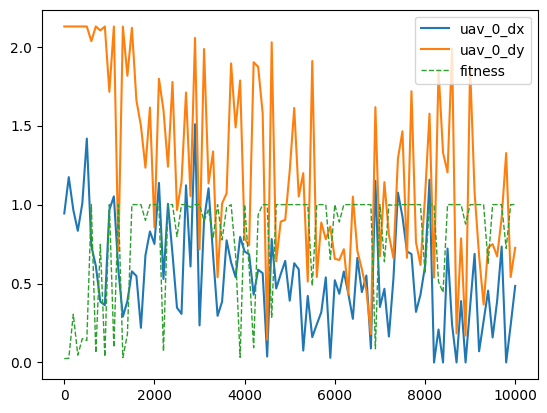

In [261]:
keys_to_plot = ["uav_0_dx", "uav_0_dy"]
for key in mutual_info_dx:
    if key != "generations" and key in keys_to_plot:
        plt.plot(mutual_info_dx["generations"], mutual_info_dx[key])
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.legend(keys_to_plot+["fitness"])
plt.show()

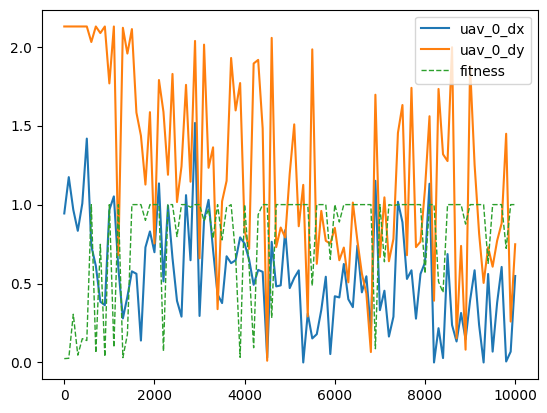

In [262]:
keys_to_plot = ["uav_0_dx", "uav_0_dy"]
for key in mutual_info_dy:
    if key != "generations" and key in keys_to_plot:
        plt.plot(mutual_info_dy["generations"], mutual_info_dy[key])
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.legend(keys_to_plot+["fitness"])
plt.show()

In [258]:
mutual_info_rover_x = get_mutual_info_from_trajs(traj_dfs, var_name="rover_0_y", gen_nums=gen_saves)
mutual_info_rover_y = get_mutual_info_from_trajs(traj_dfs, var_name="rover_0_x", gen_nums=gen_saves)

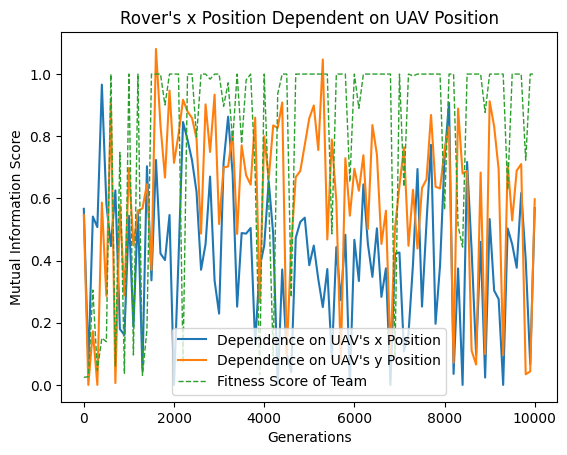

In [264]:
keys_to_plot = ["uav_0_x", "uav_0_y"]
for key in mutual_info_rover_x:
    if key != "generations" and key in keys_to_plot:
        plt.plot(mutual_info_rover_x["generations"], mutual_info_rover_x[key])
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.legend(["Dependence on UAV's x Position", "Dependence on UAV's y Position"]+["Fitness Score of Team"])
plt.xlabel("Generations")
plt.ylabel("Mutual Information Score")
plt.title("Rover's x Position Dependent on UAV Position")

plt.show()


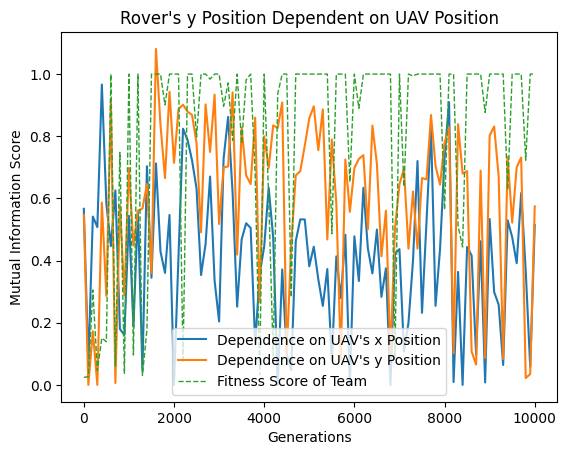

In [265]:
keys_to_plot = ["uav_0_x", "uav_0_y"]
for key in mutual_info_rover_y:
    if key != "generations" and key in keys_to_plot:
        plt.plot(mutual_info_rover_y["generations"], mutual_info_rover_y[key])
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.legend(["Dependence on UAV's x Position", "Dependence on UAV's y Position"]+["Fitness Score of Team"])
plt.xlabel("Generations")
plt.ylabel("Mutual Information Score")
plt.title("Rover's y Position Dependent on UAV Position")
plt.show()

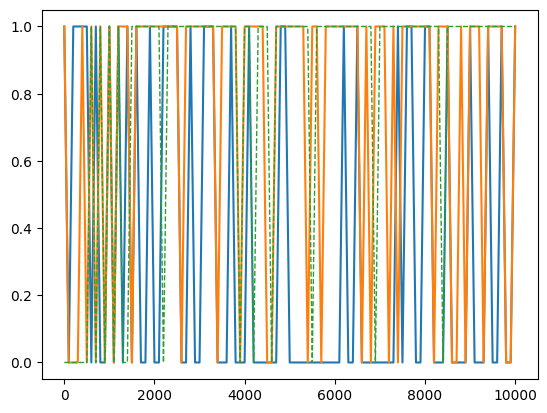

In [277]:
# Okay so it looks like I should be looking at mutual information between states
# I wonder if I can make the relationship clearer with some thresholding
keys_to_plot = ["uav_0_x", "uav_0_y"]
threshold = 0.4
for key in mutual_info_rover_x:
    if key != "generations" and key in keys_to_plot:
        thresholded_info = [1.0 if m > 0.5 else 0.0 for m in mutual_info_rover_x[key]]
        plt.plot(mutual_info_rover_x["generations"], thresholded_info)
threshold_fitness = [1.0 if m > 0.5 else 0.0 for m in fitness_df[" team_fitness"][::100]]
plt.plot(fitness_df["generation"][::100], threshold_fitness, "--", linewidth=1)
plt.show()

In [273]:
print(mutual_info_rover_x["uav_0_x"])
thresholded_info = [1.0 if m > 0.5 else 0.0 for m in mutual_info_rover_x["uav_0_x"]]
print(thresholded_info)

0      0.566466
1      0.065855
2      0.541690
3      0.507714
4      0.966129
         ...   
96     0.376850
97     0.617763
98     0.403638
99     0.066216
100    0.568964
Name: uav_0_x, Length: 101, dtype: float64
[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]


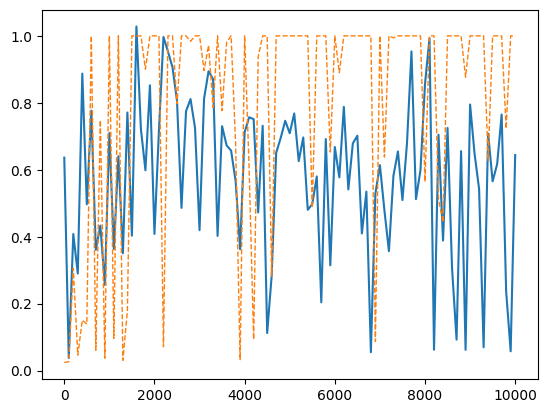

In [302]:
# I wonder if the story gets clearer if I add them all together
mutual_info_states = mutual_info_rover_x["uav_0_x"]+mutual_info_rover_x["uav_0_y"]+mutual_info_rover_y["uav_0_x"]+mutual_info_rover_y["uav_0_y"]
plt.plot(mutual_info_rover_x["generations"], mutual_info_states/3.5)
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.show()


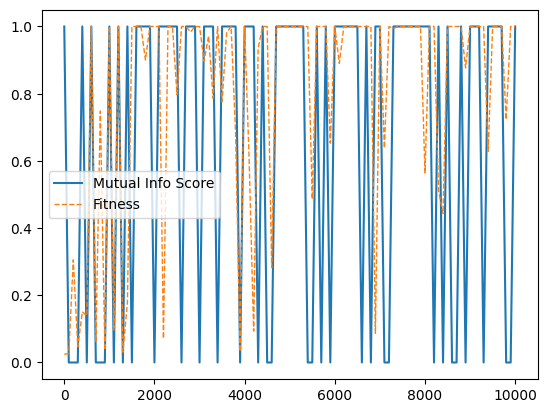

In [304]:
# Now let's threshold this stuff
info_threshold = 0.5
fit_threshold = 0.5
mutual_info_states = mutual_info_rover_x["uav_0_x"]+mutual_info_rover_x["uav_0_y"]+mutual_info_rover_y["uav_0_x"]+mutual_info_rover_y["uav_0_y"]
normalized_info = mutual_info_states/3.5
thresholded_info = [1.0 if m > info_threshold else 0.0 for m in normalized_info]
plt.plot(mutual_info_rover_x["generations"], thresholded_info)
# thresholded_fit = [1.0 if m > fit_threshold else 0.0 for m in fitness_df[" team_fitness"][::100]]
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.legend(["Mutual Info Score", "Fitness"])
plt.show()

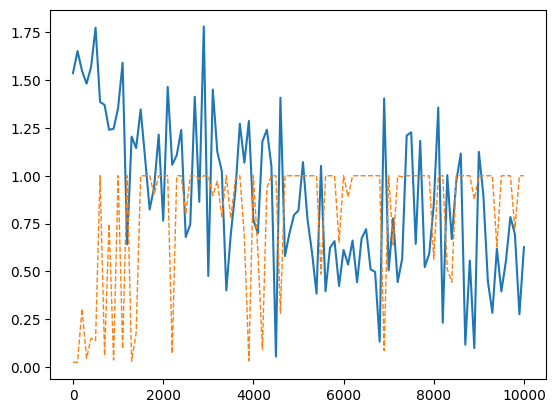

In [307]:
# same thing with actions?
mutual_info_states = mutual_info_dx["uav_0_dx"]+mutual_info_dx["uav_0_dy"]+mutual_info_dy["uav_0_dx"]+mutual_info_dy["uav_0_dy"]
plt.plot(mutual_info_rover_x["generations"], mutual_info_states/4)
plt.plot(fitness_df["generation"][::100], fitness_df[" team_fitness"][::100], "--", linewidth=1)
plt.show()
# This seems so counter intuitive. The states should have shared mutual information but not the actions?
# I suppose it's because the rover learns to maximize its fitness by getting as close to the uav as possible
# Don't pay attention to what the uav does, pay attention to where the uav is


In [308]:
# Ok actually what I think I should do
# is sort the fitnesses from lowest to highest
# And sort the mutual information scores in the same way
# And then it should be easier to see if there is a connection or not
mutual_info_states

0      6.144606
1      6.604669
2      6.191874
3      5.924396
4      6.271011
         ...   
96     2.213345
97     3.137450
98     2.781452
99     1.105254
100    2.507634
Length: 101, dtype: float64